# Section 2

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

plt.rcParams.update({
    #"text.usetex": True,
    "font.family": "serif",
    "font.size": 16
})

In [2]:
from hubbard_atom import *

$$
G(\tau) = -\frac{1}{2}\left(
    \frac{e^{- \tau U/2}}{1+e^{-\beta U/2}} + \frac{e^{\tau U/2}}{1+e^{-\beta U/2}}
\right)
$$

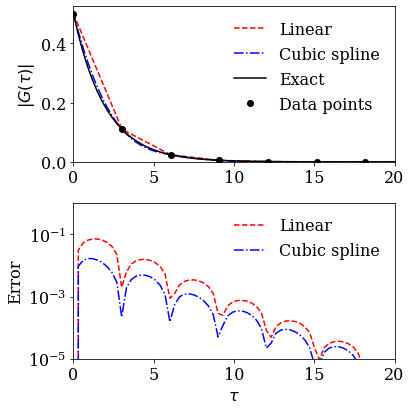

In [3]:
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
axes = [ax1, ax2]


ntau = 100

taus = np.linspace(0.0, beta, ntau)
taus_fine = np.linspace(0.0, beta, 10*ntau)

gtau_data = gtau(taus)
gtau_data_fine = gtau(taus_fine)

# Linear interpolation
gtau_linear = interp1d(taus, gtau_data, kind='linear')(taus_fine)

# Cubic spline interpolation
interp_cspline = interp1d(taus, gtau_data, kind='cubic')
gtau_cspline = interp_cspline(taus_fine)

ax1.plot(taus_fine, np.abs(gtau_linear), ls='--', label='Linear', color='r')
ax1.plot(taus_fine, np.abs(gtau_cspline), ls='-.', label='Cubic spline', color='b')
ax1.plot(taus_fine, np.abs(gtau_data_fine), ls='-', marker='', label='Exact', color='k')
ax1.plot(taus, np.abs(gtau_data), ls='', marker='o', label='Data points', color='k')

ax2.semilogy(taus_fine, np.abs(gtau_linear-gtau_data_fine), ls='--', label='Linear', color='r')
ax2.semilogy(taus_fine, np.abs(gtau_cspline-gtau_data_fine), ls='-.', label='Cubic spline', color='b')

ax1.set_ylabel(r'$|G(\tau)|$')
ax1.set_ylim([0, None])
ax2.set_ylabel(r'Error')
ax2.set_xlabel(r'$\tau$')
ax2.set_xlim([0,20])
ax2.set_ylim([1e-5,1])
ax1.legend(frameon=False)
ax2.legend(frameon=False)
plt.tight_layout()
plt.savefig('interpolation_gtau.pdf', transparent=True)
plt.show()

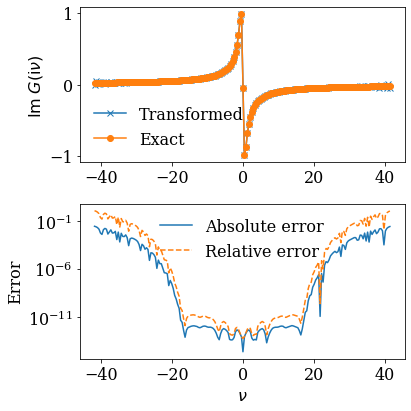

In [4]:
from numpy.polynomial.legendre import leggauss

# Quadrature rule over interval [0, beta]
x, y = leggauss(deg=1000)
taus_leggauss = beta * (x+1)/2
weights_leggauss = (beta/2) * y

# Matsubara frequencies (every 20 points)
v = 2*np.arange(-2000, 2000, 20)+1

# Perform numerical integration using linear algebra
phase = np.exp(1J*v[:,None]*taus_leggauss[None,:]*np.pi/beta)
giv_approx = (phase * weights_leggauss[None,:]) @ gtau(taus_leggauss)

giv_exact = giv(v)

fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
axes = [ax1, ax2]

ax1.plot(v * np.pi/beta, giv_approx.imag, label='Transformed', marker='x')
ax1.plot(v * np.pi/beta, giv_exact.imag, label='Exact', marker='o')
ax2.semilogy(v * np.pi/beta, np.abs(giv_exact-giv_approx), label='Absolute error', marker='', ls='-')
ax2.semilogy(v * np.pi/beta, np.abs((giv_exact-giv_approx)/giv_exact), label='Relative error', marker='', ls='--')

ax2.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\mathrm{Im}~G(\mathrm{i}\nu)$')
ax2.set_ylabel(r'Error')

ax1.legend(frameon=False, loc='best')
ax2.legend(frameon=False)
plt.tight_layout()
plt.tight_layout()
plt.savefig('fourier_transform_hubbard_atom.pdf', transparent=True)